<a href="https://colab.research.google.com/github/NopeSieun/machine_learning_pracrice/blob/main/Lab03_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW2_202001996**.ipynb

In [ ]:
from google.colab import drive #드라이브 끌어오기 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray, rgba2rgb

### 직접 찍은 noisy image를 가져온다.

(512, 512) float64


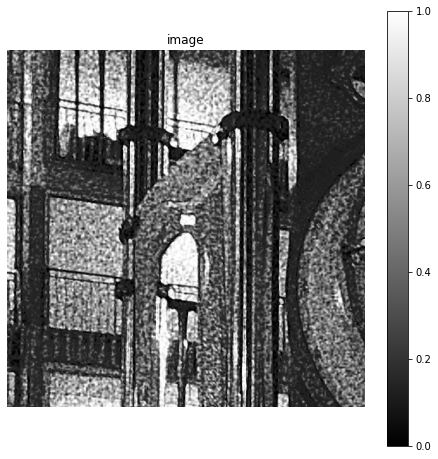

In [ ]:
myfolder = '/content/drive/MyDrive/DIgital_image/' #이미지 데이터 불러오기 
img1 = os.path.join(myfolder,'444.jpg')
img = rgb2gray(io.imread(img1)) #noise가 많은 이미지 흑백 처리
img_crop = np.array(img)#image crop
img_crop = img_crop[800:1312, 400:912]
plt.figure(figsize=(8,8)) ##figure size설정
print(img_crop.shape,img_crop.dtype)
plt.imshow(img_crop,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('image')
plt.show() #이미지 show

### 2D median filtering & mean filtering

- 다음은 3x3, 5x5, 7x7 크기의 neighborhood를 이용한 median filtering과 mean filtering을 수행하는 함수를 구현한 것이다. 


In [ ]:
def MyMedianFilter(I, n): #(I,n) -> n에 수 집어넣기 (커널 사이즈), median필터 구현하기
  y = np.shape(I) #잡음img 불러오기(array)
  filter_size=(n,n) #filter size 원하는 수 넣을 수 있도록 설정
  y_shape = tuple(np.int64((np.array(y)-np.array(filter_size)))) #tuple형태로 변환해서 사용
  result = np.zeros(y_shape)#shape 맞춰 0채운 array 반환

  for i in np.arange(1,y_shape[0]-1):
    for j in np.arange(1,y_shape[1]-1):
      search = img_crop[i:i+filter_size[0],j:j+filter_size[1]] 
      search = np.sort(search.ravel()) #평평하게 만든 후 정렬해주기 (revel() 사용)
      result[i,j] = search[int(filter_size[0]*filter_size[1]/2)] #결과, 중간값 도출
  return result #반환


In [ ]:
def MyMeanFilter(I, n): #(I,n) n에 커널 사이즈 집어넣을 수 있도록 구현한 mean filtering 함수
  y = np.shape(I) #잡음img 불러오기(array)
  filter_size=(n,n) #filter size 원하는 수 넣을 수 있도록 설정
  y_shape = tuple(np.int64((np.array(y)-np.array(filter_size)))) #tuple형태로 변환해서 사용
  result = np.zeros(y_shape)#shape 맞춰 0채운 array 반환

  for i in np.arange(1,y_shape[0]-1):
    for j in np.arange(1,y_shape[1]-1):
      search = img_crop[i:i+filter_size[0],j:j+filter_size[1]] 
      search = np.sort(search.ravel()) #평평하게 만든 후 정렬해주기 (revel() 사용)
      result[i,j] = search[int(sum(search)/len(search))] #결과, 평균값 도출
  return result #반환



### 정의한 함수에 image와 n크기를 넣어 filtered image를 얻는다.

In [ ]:
g3_median = MyMedianFilter(img_crop, 3) #3x3의 neighborhood 적용
g3_mean = MyMeanFilter(img_crop, 3)

In [ ]:
g5_median = MyMedianFilter(img_crop, 5) #5x5의 neighborhood 적용
g5_mean = MyMeanFilter(img_crop, 5)

In [ ]:
g7_median = MyMedianFilter(img_crop, 7) #7x7의 neighborhood 적용
g7_mean = MyMeanFilter(img_crop, 7)

### noisy image와 filtered image를 비교하기

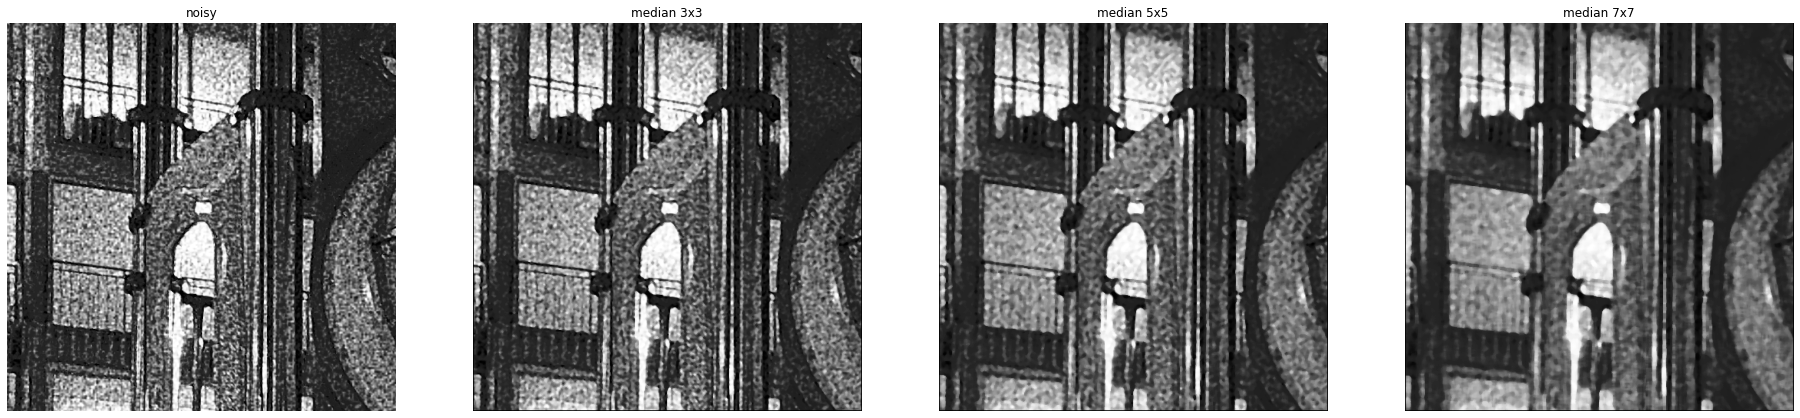

In [ ]:
#median filter 확인

plt.figure(figsize=(32,32)) 
plt.subplot(141)
plt.imshow(img_crop,cmap='gray')
plt.axis('off')
plt.title('noisy')
plt.subplot(142)
plt.imshow(g3_median,cmap='gray') #5x5 결과 확인
plt.axis('off')
plt.title('median 3x3')
plt.subplot(143)
plt.imshow(g5_median,cmap='gray') #5x5 결과 확인
plt.axis('off')
plt.title('median 5x5')
plt.subplot(144)
plt.imshow(g7_median,cmap='gray') #5x5 결과 확인
plt.axis('off')
plt.title('median 7x7')
plt.show()


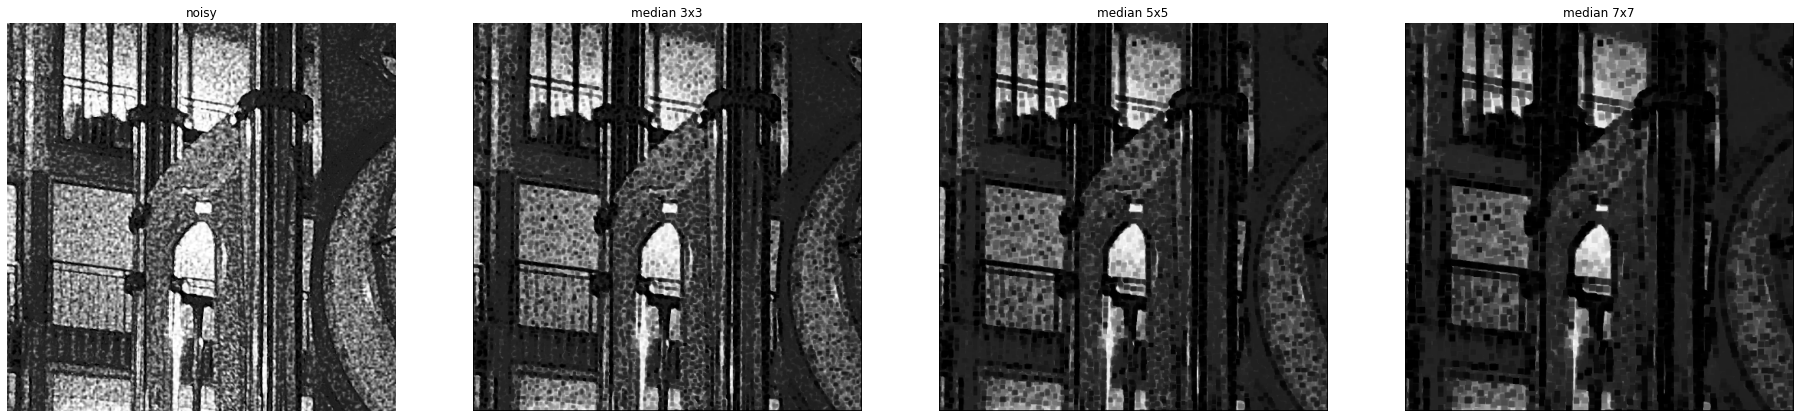

In [ ]:
#mean filter 확인

plt.figure(figsize=(32,32))
plt.subplot(141)
plt.imshow(img_crop,cmap='gray')
plt.axis('off')
plt.title('noisy')
plt.subplot(142)
plt.imshow(g3_mean,cmap='gray') #5x5 결과 확인
plt.axis('off')
plt.title('median 3x3')
plt.subplot(143)
plt.imshow(g5_mean,cmap='gray') #5x5 결과 확인
plt.axis('off')
plt.title('median 5x5')
plt.subplot(144)
plt.imshow(g7_mean,cmap='gray') #5x5 결과 확인
plt.axis('off')
plt.title('median 7x7')
plt.show()

### 새로운 image 가져오기

(1012, 1012) float64


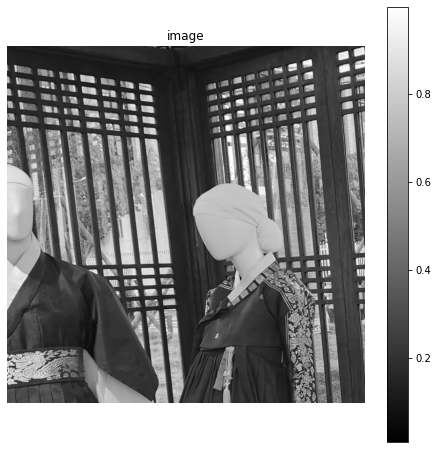

In [ ]:
myfolder = '/content/drive/MyDrive/DIgital_image/' #이미지 데이터 불러오기 
img2 = os.path.join(myfolder,'555.jpg')
img2_gray = rgb2gray(io.imread(img2)) #경계선이 많은 이미지 사용
img_crop = np.array(img2_gray) #image crop
img_crop = img_crop[500:1512, 600:1612] #1000x1000
print(img_crop.shape,img_crop.dtype) #데이터타입 확인 
plt.figure(figsize=(8,8)) #figure size설정
plt.imshow(img_crop,cmap='gray')
plt.axis('off')
plt.title('image')
plt.colorbar()
plt.show()


### nxn 크기의 kernel을 통한 2D convolution을 하는 함수를 정의하기

In [ ]:
def MyConvFilter(image,kernel): 
  kernel = np.flipud(np.fliplr(kernel))
  image = image.astype(np.float64)
  output = np.zeros(np.subtract(image.shape,image.shape))

  for y in range(output.shape[1]):
    for x in range(output.shape[0]):
      output[x, y] = (kernel * image[x: x + kernel.shape[0], y: y + kernel.shape[1]]).sum()
  return output

### laplacian kernel & sobel kernel & robert kernel 을 각각 정의하기

In [ ]:
w_L = np.array([[0,1,0],[1,-4.,1],[0,1,0]]) #laplacian kernel 
w_S1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #sobel kernel 1
w_S2 = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) #sobel kernel 2
w_R1 = np.array([[-1,0],[0,1]]) #robert kernel 1
w_R2 = np.array([[0,1],[-1,0]]) #robert kernel 2
print(w_L)
print(w_S1)
print(w_S2)
print(w_R1)
print(w_R2)

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]
[[-1  0]
 [ 0  1]]
[[ 0  1]
 [-1  0]]


### 정의한 함수에 image와 kernel을 넣어 filtered image를 얻고 결과를 확인하기

In [ ]:
g_L = MyConvFilter(img_crop,w_L)
print(g_L.dtype,g_L.shape)
g_S1 = MyConvFilter(img_crop,w_S1)
print(g_S1.dtype,g_S1.shape)
g_S2 = MyConvFilter(img_crop,w_S2)
print(g_S2.dtype,g_S2.shape)
g_R1 = MyConvFilter(img_crop,w_R1)
print(g_R1.dtype,g_R1.shape)
g_R2 = MyConvFilter(img_crop,w_R2)
print(g_R2.dtype,g_R2.shape)

float64 (0, 0)
float64 (0, 0)
float64 (0, 0)
float64 (0, 0)
float64 (0, 0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launc

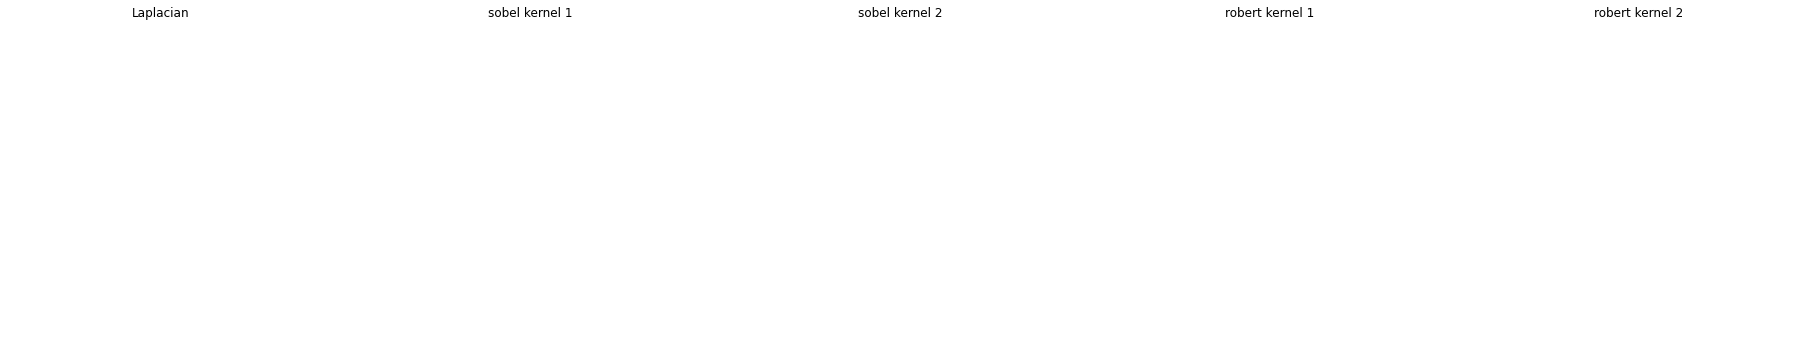

In [ ]:
plt.figure(figsize=(32,32))
plt.subplot(151)
plt.imshow(g_L,cmap='gray')
plt.axis('off')
plt.title('Laplacian')
plt.subplot(152)
plt.imshow(g_S1,cmap='gray')
plt.axis('off')
plt.title('sobel kernel 1')
plt.subplot(153)
plt.imshow(g_S2,cmap='gray')
plt.axis('off')
plt.title('sobel kernel 2')
plt.subplot(154)
plt.imshow(g_R1,cmap='gray')
plt.axis('off')
plt.title('robert kernel 1')
plt.subplot(155)
plt.imshow(g_R2,cmap='gray')
plt.axis('off')
plt.title('robert kernel 2')
plt.show() #각 결과 한 줄로 도출